In [1]:
import numpy as np

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
from typing import List
from sklearn.preprocessing import OneHotEncoder
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [2]:
%%bash
rm -Rf train-images-idx3-ubyte.gz
rm -Rf train-labels-idx1-ubyte.gz
wget -q http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
wget -q http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

In [3]:
with gzip.open('train-labels-idx1-ubyte.gz') as train_labels:
    data_from_train_file = train_labels.read()

In [6]:
# Skip the first 8 bytes, we know exactly how many labels there are
label_data = data_from_train_file[8:]
assert len(label_data) == 60000

# Convert every byte to an integer. This will be a number between 0 and 9
labels = [int(label_byte) for label_byte in label_data]
assert min(labels) == 0 and max(labels) == 9
assert len(labels) == 60000

In [7]:
label_data

b'\x05\x00\x04\x01\t\x02\x01\x03\x01\x04\x03\x05\x03\x06\x01\x07\x02\x08\x06\t\x04\x00\t\x01\x01\x02\x04\x03\x02\x07\x03\x08\x06\t\x00\x05\x06\x00\x07\x06\x01\x08\x07\t\x03\t\x08\x05\t\x03\x03\x00\x07\x04\t\x08\x00\t\x04\x01\x04\x04\x06\x00\x04\x05\x06\x01\x00\x00\x01\x07\x01\x06\x03\x00\x02\x01\x01\x07\t\x00\x02\x06\x07\x08\x03\t\x00\x04\x06\x07\x04\x06\x08\x00\x07\x08\x03\x01\x05\x07\x01\x07\x01\x01\x06\x03\x00\x02\t\x03\x01\x01\x00\x04\t\x02\x00\x00\x02\x00\x02\x07\x01\x08\x06\x04\x01\x06\x03\x04\x05\t\x01\x03\x03\x08\x05\x04\x07\x07\x04\x02\x08\x05\x08\x06\x07\x03\x04\x06\x01\t\t\x06\x00\x03\x07\x02\x08\x02\t\x04\x04\x06\x04\t\x07\x00\t\x02\t\x05\x01\x05\t\x01\x02\x03\x02\x03\x05\t\x01\x07\x06\x02\x08\x02\x02\x05\x00\x07\x04\t\x07\x08\x03\x02\x01\x01\x08\x03\x06\x01\x00\x03\x01\x00\x00\x01\x07\x02\x07\x03\x00\x04\x06\x05\x02\x06\x04\x07\x01\x08\t\t\x03\x00\x07\x01\x00\x02\x00\x03\x05\x04\x06\x05\x08\x06\x03\x07\x05\x08\x00\t\x01\x00\x03\x01\x02\x02\x03\x03\x06\x04\x07\x05\x00\x06\x

In [8]:
SIZE_OF_ONE_IMAGE = 28 ** 2
images = []

# Iterate over the train file, and read one image at a time
with gzip.open('train-images-idx3-ubyte.gz') as train_images:
    train_images.read(4 * 4)
    ctr = 0
    for _ in range(60000):
        image = train_images.read(size=SIZE_OF_ONE_IMAGE)
        assert len(image) == SIZE_OF_ONE_IMAGE

        # Convert to numpy
        image_np = np.frombuffer(image, dtype='uint8') / 255
        images.append(image_np)

images = np.array(images)
images.shape

(60000, 784)

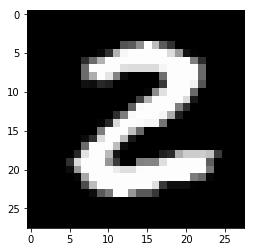

In [9]:
def plot_image(pixels: np.array):
    plt.imshow(pixels.reshape((28, 28)), cmap='gray')
    plt.show()
plot_image(images[25])

In [10]:
labels_np = np.array(labels).reshape((-1, 1))

encoder = OneHotEncoder(categories='auto')
labels_np_onehot = encoder.fit_transform(labels_np).toarray()

labels_np_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [11]:
labels_np_onehot[999]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

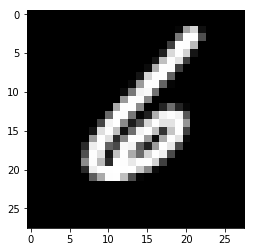

In [12]:
plot_image(images[999])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_np_onehot)

In [14]:
y_train.shape

(45000, 10)

In [15]:
X_train.shape

(45000, 784)

In [16]:
y_test.shape

(15000, 10)

In [17]:
model = keras.Sequential()
model.add(keras.layers.Dense(input_shape=(SIZE_OF_ONE_IMAGE,), units=128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, epochs=20, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
45000/45000 [==============================] - 3s 75us/sample - loss: 1.3708 - acc: 0.6688
Epoch 2/20
45000/45000 [==============================] - 3s 66us/sample - loss: 0.6504 - acc: 0.8460
Epoch 3/20
45000/45000 [==============================] - 3s 67us/sample - loss: 0.5009 - acc: 0.8723
Epoch 4/20
45000/45000 [==============================] - 3s 67us/sample - loss: 0.4362 - acc: 0.8848
Epoch 5/20
45000/45000 [==============================] - 3s 67us/sample - loss: 0.3986 - acc: 0.8920
Epoch 6/20
45000/45000 [==============================] - 3s 68us/sample - loss: 0.3729 - acc: 0.8979
Epoch 7/20
45000/45000 [==============================] - 3s 67us/sample - loss: 0.3537 - acc: 0.9022
Epoch 8/20
45000/45000 [==============================] - 3s 69us/sample - loss: 0.3387 - acc: 0.9055
Epoch 9/20
45000/45000 [==============================] - 3s 70us/sample - loss: 0.3259 - acc: 0.9085
Epoch 10/20
45000/45000 [=========

In [19]:
model.evaluate(X_test, y_test)

15000/15000 [==============================] - 1s 79us/sample - loss: 0.2492 - acc: 0.9322


[0.24918857661883037, 0.9322]

In [20]:
y_test[1010]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

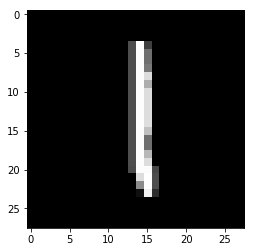

In [21]:
plot_image(X_test[1010])

In [22]:
y_test[776]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

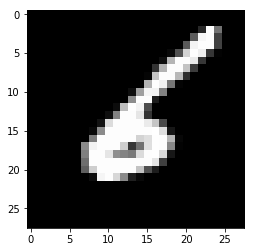

In [23]:
plot_image(X_test[776])

In [24]:
predicted_results = model.predict(X_test[1010].reshape((1, -1)))

In [25]:
predicted_results.sum()

0.9999999

In [26]:
predicted_outputs = np.argmax(model.predict(X_test), axis=1)
expected_outputs = np.argmax(y_test, axis=1)

predicted_confusion_matrix = confusion_matrix(expected_outputs, predicted_outputs)

In [27]:
predicted_confusion_matrix

array([[1472,    0,    5,    1,    4,    8,    7,    2,   13,    1],
       [   1, 1646,    9,    7,    1,   10,    2,    6,   25,    3],
       [  11,   15, 1314,   17,   22,    5,   10,   17,   28,    3],
       [   4,    8,   21, 1345,    3,   49,    5,   25,   37,   11],
       [   5,    7,    8,    0, 1386,    0,   12,    2,    9,   36],
       [  14,    8,    9,   30,   12, 1227,   17,    4,   16,    9],
       [  12,    6,    9,    0,    9,   21, 1401,    0,   10,    0],
       [   8,   10,   21,    1,   11,    2,    0, 1475,    5,   36],
       [   7,   17,    7,   28,    8,   18,   22,    4, 1325,   12],
       [   9,    8,    3,   21,   39,    8,    1,   38,   12, 1392]])

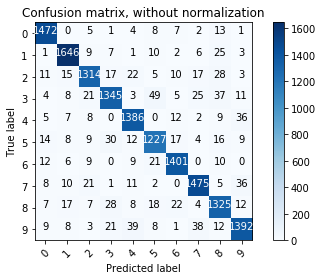

In [28]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
class_names = [str(idx) for idx in range(10)]
cnf_matrix = confusion_matrix(expected_outputs, predicted_outputs)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()